# **Proyek Statistika Inferensi**
<hr>

Kelas: Statistika Inferensi - TIF A

Kelompok 3:

1. Riski Darmawan   (195150200111039)
2. Aldi Fianda Putra    (195150201111034)
3. Hasyir Daffa Ibrahim     (195150207111039)

<hr>
<hr>
<hr>

# Poin 2

Tiap kelompok memilih salah satu data dari dataset public di UCI dataset, Kaggle dataset (atau
yang lain) yang dilengkapi dengan label kelas.

a. Pastikan tiap kelompok memilih data yang berbeda

b. Jumlah fitur minimal adalah 3

c. Jelaskan deskripsi dari data

d. Amati data meliputi tipe data dari tiap fitur

e. Lakukan preproses untuk mengetahui komposisi data, distribusi data, apakah ada missing value dan outlier.

f. Lakukan visualisasi komposisi dan outlier (jika ada) menggunakan grafik yang sesuai dan berikan penjelasan dari grafik yang ada peroleh.

g. Visualisasikan distribusi data menggunakan histogram (diskrit) dan fungsi yang sesuai (kontinyu). Misal untuk distribusi normal menggunakan kurva gaussian. Selanjutnya berikan penjelasan terhadap grafik anda.

## Deskripsi Data

**Dataset:** Palmer Archipelago (Antarctica) penguin data

Sumber: https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data

Dataset Palmer Archipelago (Antarctica) Penguin Data merupakan dataset yang dikumpulan dan disediakan oleh Dr. Kristen Gorman, Palmer Station, dan Antarctica LTER (Long Term Ecological Research) Network. Dataset ini terdiri dari dua file dengan format csv, salah satunya merupakan dataset penguin_size. Dataset penguin_size merupakan data yang disederhanakan dari dataset penguin yang asli. Dataset ini merupakan dataset mengenai 3 spesies penguin, yaitu spesies Adélie, Chinstrap, dan Gentoo. Setiap spesies ditentukan dengan mempertimbangkan ciri cirinya, berupa panjang culmen, kedalaman culmen, panjang sirip, massa tubuh, nama pulau, dan jenis kelaminnya. Dengan demikian, fitur pada dataset ini berjumlah 6 dengan 344 baris data.



In [ ]:
# import modul / dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## EDA & Preprocessing

Mendapatkan informasi umum dari dataset. Salah satunya tipe data tiap fitur.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.shape

(344, 7)

**Penjelasan**

Dengan menggunakan fungsi info pada python, maka informasi singkat mengenai dataframe akan ditampilkan melalui nama kolom, jumlah data yang bukan null, dan tipe datanya. Dari informasi di atas, diketahui terdapat 3 kolom bertipe data kategorikal dan 4 kolom bertipe data numerik. Selain itu, diketahui bahwa seharusnya total baris data adalah 344 pada setiap atribut, tetapi terdapat lima atribut yang memiliki missing value. Missing value ini nantinya akan diperbaiki dengan mengisikan nilainya berdasarkan rata-rata untuk data yang bertipe numerik dan mengisikan dengan nilai yang paling sering muncul atau modus untuk data kategorikal. Pemeriksaan missing value juga dapat dilakukan dengan menjalankan fungsi isnull seperti proses dibawah.

Mendapatkan rangkuman informasi deskriptif dari fitur data yang dapat dihitung secara statistik

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Mendapatkan informasi jumlah data setiap kelas

In [ ]:
df.groupby("species").size()

species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64

Mendapatkan informasi ada atau tidaknya data duplikat dalam dataset

In [ ]:
df.duplicated().value_counts()

False    344
dtype: int64

Mendapatkan informasi missing value pada dataset

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

**Penjelasan**

Dapat dilihat pada proses diatas bahwa penggunaan isnull untuk mencari missing value pada dataset lebih mudah untuk terlihat. Dapat dilihat disini terdapat 2 missing value pada atribut culmen_length_mm, culmen_depth_mm, flipper_length_mm dan body_mass_g. Serta terdapat 10 missing value pada atribut sex.

Handle Missing Value

Pertama, khusus untuk atribut Sex disini karena terdapat data berisikan “.” maka dari itu disini dengan manual kita lakukan replace titik tersebut menjadi NaN.

In [ ]:
# Khusus atribut sex, replace baris yang bernilai "." pada kolom sex
df['sex'].replace('.', np.nan, inplace=True)

In [ ]:
# Mengganti nilai Nan
for i in df.columns:
    if(df[i].isnull().any()==True):
        if(df[i].dtype=='float64'):
            df[i] = df[i].replace(np.nan,df[i].mean())
        if(df[i].dtype=='object'):
            df[i]=df[i].replace(np.nan,df[i].mode()[0])

Selanjutnya, pada bagian ini seperti yang sudah dibahas sebelumnya dimana untuk nilai atribut yang bertipe numerik akan diisikan dengan nilai rerata sedangkan untuk nilai atribut yang bertipe kategorikal akan diisikan dengan modus. Selanjutnya kita menjalankan command isnull lagi untuk memeriksa apakan missing value sudah teratasi. Dapat dilihat pada proses dibawah, bahwa tidak terdapat missing value lagi.

In [ ]:
# Memeriksa kembali apakah ada nilai Nan
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Mendapatkan informasi ada atau tidaknya outlier dalam dataset

In [ ]:
def cari_outlier(df, daftar_fitur):
    indeks_outlier = []
    
    for fitur in daftar_fitur:
        # deklarasi kuartil1 dan kuartil 3
        q1, q3 = np.percentile(df[fitur], [25,75])
        
        # Interquartile Range
        iqr = q3 - q1

        # batas minimum dan maximum outlier
        minimum = q1 - (1.5 * iqr)
        maximum = q3 + (1.5 * iqr)

        # deteksi outlier and indeksnya
        daftar_outlier = df[(df[fitur] < minimum) | (df[fitur] > maximum)].index
        
        # menyimpan indeks
        indeks_outlier.extend(daftar_outlier)
    
    return indeks_outlier


num_column=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
cari_outlier(df, num_column)

[]

**Penjelasan**

Dapat dilihat pada proses diatas bahwa didapatkan array kosong atau dengan kata lain tidak ada outlier

## Visualisasi Komposisi dan Outlier

Komposisi Data

Berikut adalah tampilan komposisi data dengan visualisasi pie chart.

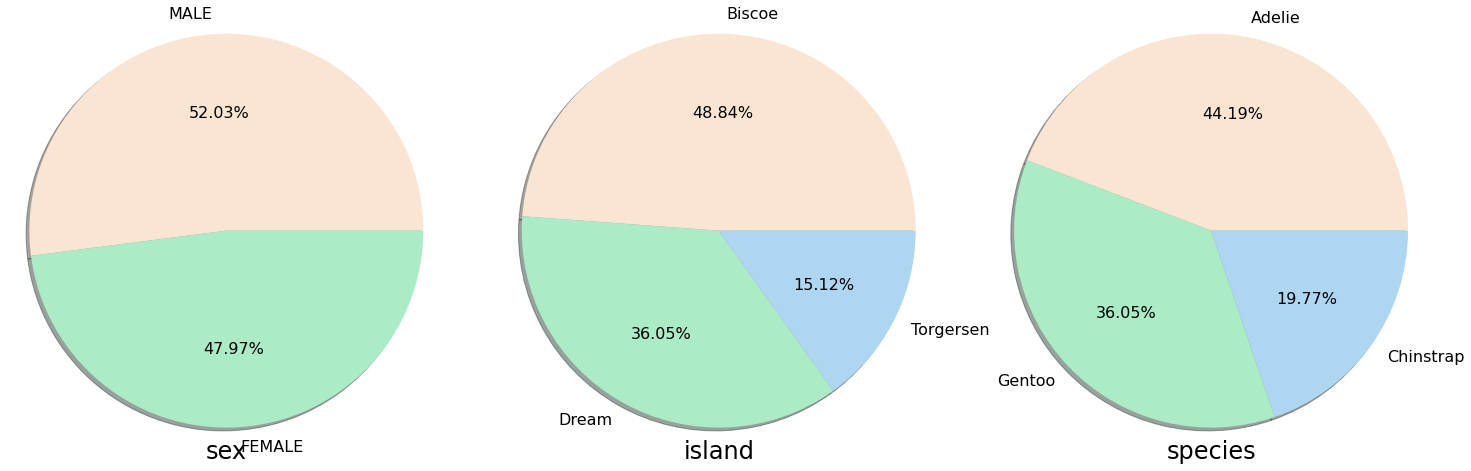

In [ ]:
cat_column=['sex','island','species']
i=1 
colors=["#FAE5D3","#ABEBC6","#AED6F1"]
textprops = {"fontsize":16}
plt.figure(figsize=(25,120))
for col in cat_column:
    plt.subplot(11,3,i)
    df[col].value_counts().plot(kind="pie",autopct="%.2f%%",colors=colors,textprops=textprops,shadow=True, radius = 1.2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(col,fontsize=24)
    plt.ylabel(' ')
    i+=1

**Penjelasan**

Data yang ditampilkan pada pie chart adalah data yang bersifat kategorikal, setiap fitur kategorik semua nilainya ditotalkan dan dipetakan menjadi bentuk rasio dalam pie chart seperti gambar diatas. Komposisinya dapat dijabarkan sebagai berikut.
1. Sex; Rasio atribut sex hampir mencapai 50:50 dengan nilai Female 47.97% dan Male 52.03%
2. Island; Rasio atribut island dominan berada pada Biscoe dengan nilai 48.84% diikuti dengan Dream 36.05% dan Torgersen 15.12%
3. Species; Pada dataset ini, special merupakan label kelas pada dataset ini. Komposisi yang didapatkan adalah Adelie 44.19%, Gentoo 36.05% dan Chinstrap 19.72%

Berikut adalah tampilan komposisi data dengan visualisasi menggunakan konsep Faceting yang didalamnya terdapat Scatterplot dan Histogram.

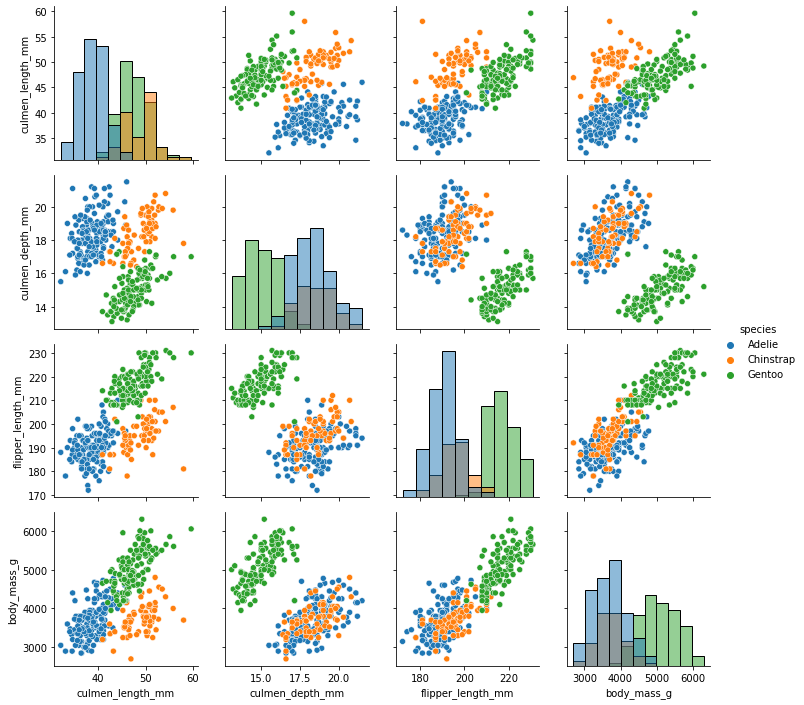

In [ ]:
g = sns.PairGrid(df,hue="species")
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()

**Penjelasan**

Data yang ditampilkan dalam Faceting adalah data yang bersifat numerikal, setiap fitur numerikal semua nilainya dipetakan terhadap sesamanya menjadi bentuk scatterplot yang berbeda dan histogram untuk yang sama. Spesies diwakili dengan 3 warna, dimana warna biru untuk Adelie, Oranye untuk Chinstrap dan Hijau untuk Gentoo. Komposisi yang muncul pada scatterplot ini diwakili dengan relasi antar atribut numerik terhadap spesies penguin. Korelasi ini dapat dilihat dengan data yang bergerombolan pada satu tempat atau berbeda tempat. Sedangkan untuk histogram yang dibentuk mewakili rasio atribut numerikal tersebut terhadap spesies sekaligus distribusi atribut itu sendiri.

Visualisasi Outlier

Berikut tampilan pemeriksaan outlier dengan jenis visualisasi boxplot.

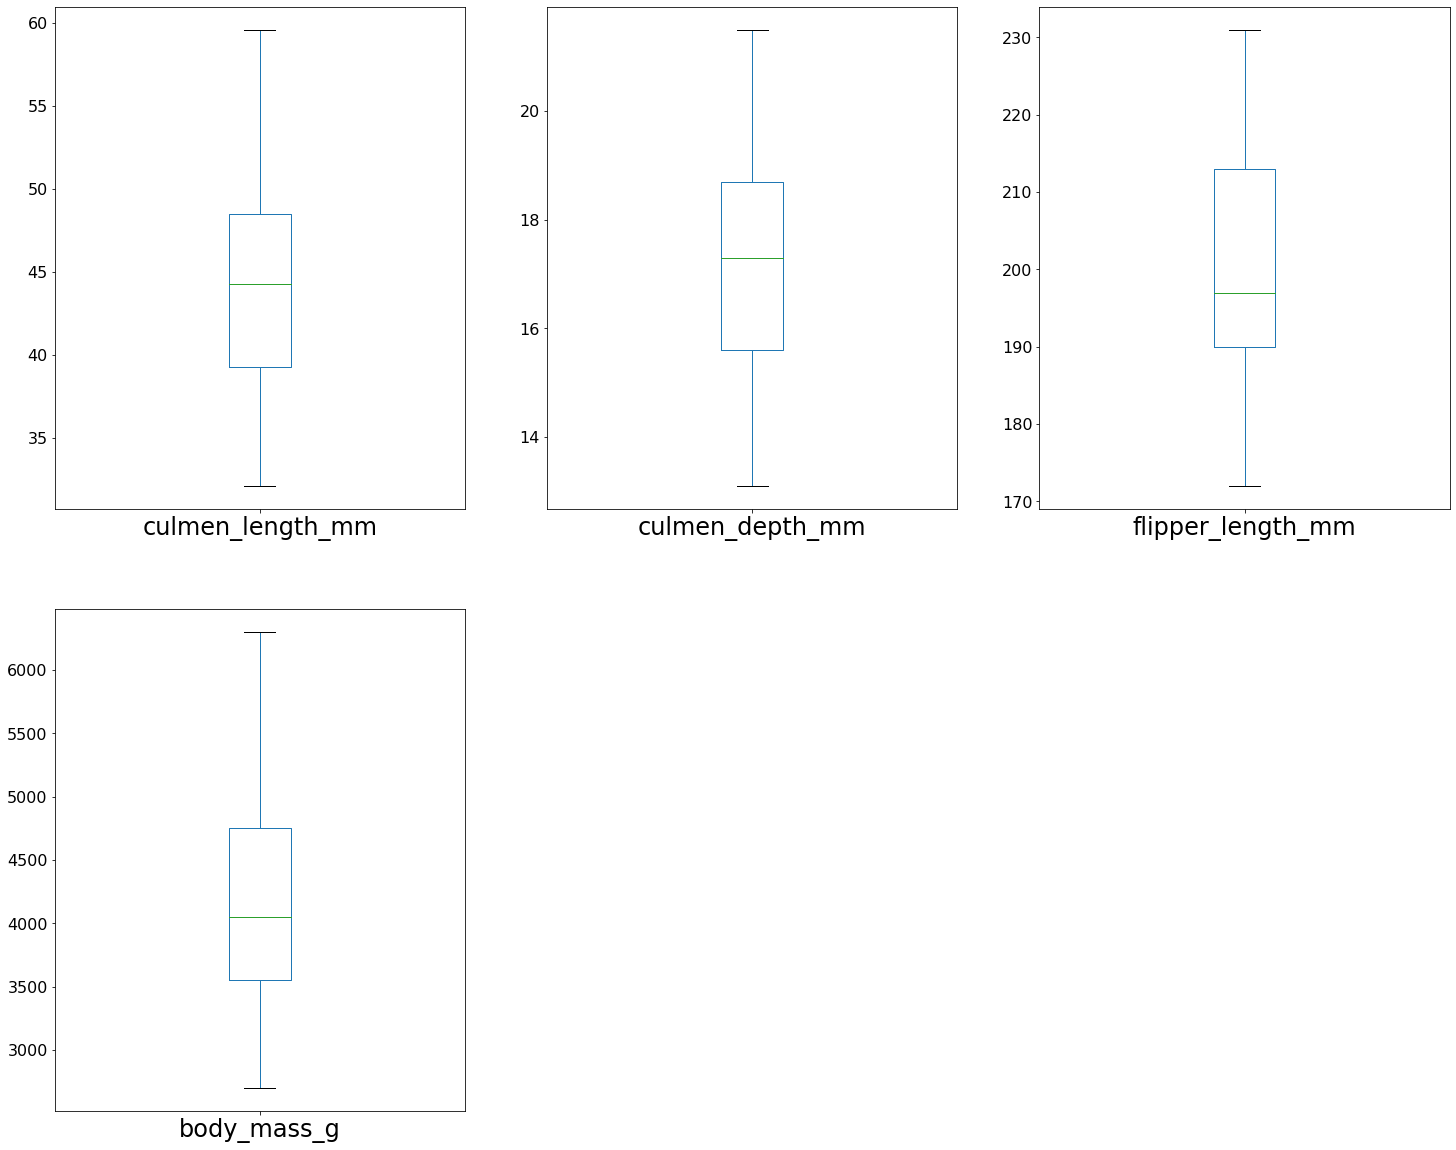

In [ ]:
num_column=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
i=1 
textprops = {"fontsize":16}
plt.figure(figsize=(25,120))
for col in num_column:
    plt.subplot(11,3,i)
    df[col].plot(kind="box")
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=16)
    i+=1

**Penjelasan**

Pemeriksaan outlier hanya dapat dilakukan pada data numerik saja seperti visualisasi diatas. Dari visualisasi boxplot diatas, atribut yang divisualisasikan adalah atribut yang memiliki nilai numerik. Terlihat pada atribut culmen_length_mm, culmen_depth_mm, flipper_length_mm dan body_mass_g tidak ada atribut yang memiliki outlier atau data pencilan.

## Visualisasi Distribusi

Berikut adalah tampilan distribusi data dengan menggunakan fungsi histplot() pada library seaborn python.

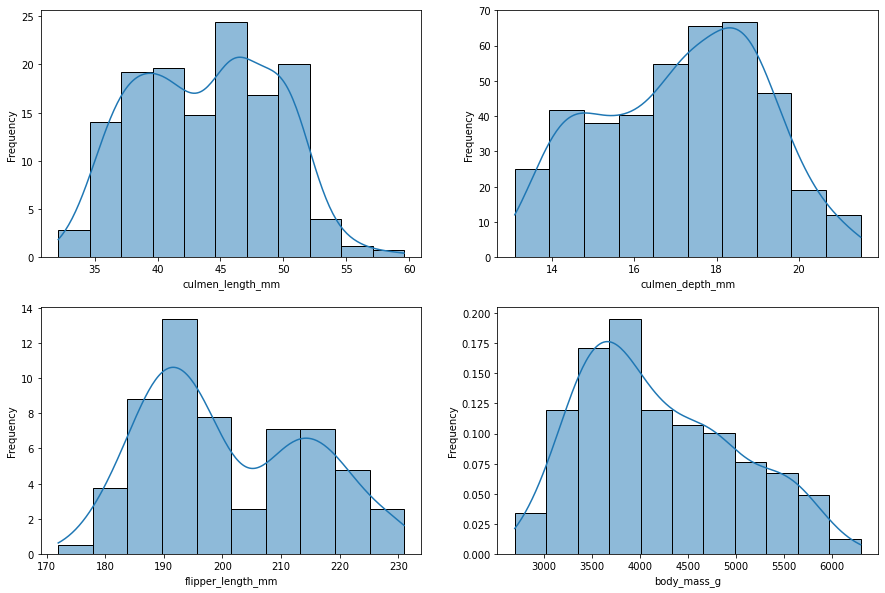

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

axes = axes.ravel()
for col, ax in zip(num_column, axes):
    sns.histplot(data=df[col], kde=True, stat='frequency', ax=ax)

plt.show()

**Penjelasan**

Data yang dapat ditampilkan dengan histogram adalah data numerik, dengan demikian hanya keempat atribut di atas yang bisa ditampilkan. Histogram digunakan untuk menampilkan distribusi dari data yang diinginkan. Distribusi dari data numerik dataset ini adalah distribusi tidak normal dimana persebaran datanya tidak simetris dan skewed.

Berikut adalah tampilan visualisasi menggunakan bar plot untuk data kategorikal.

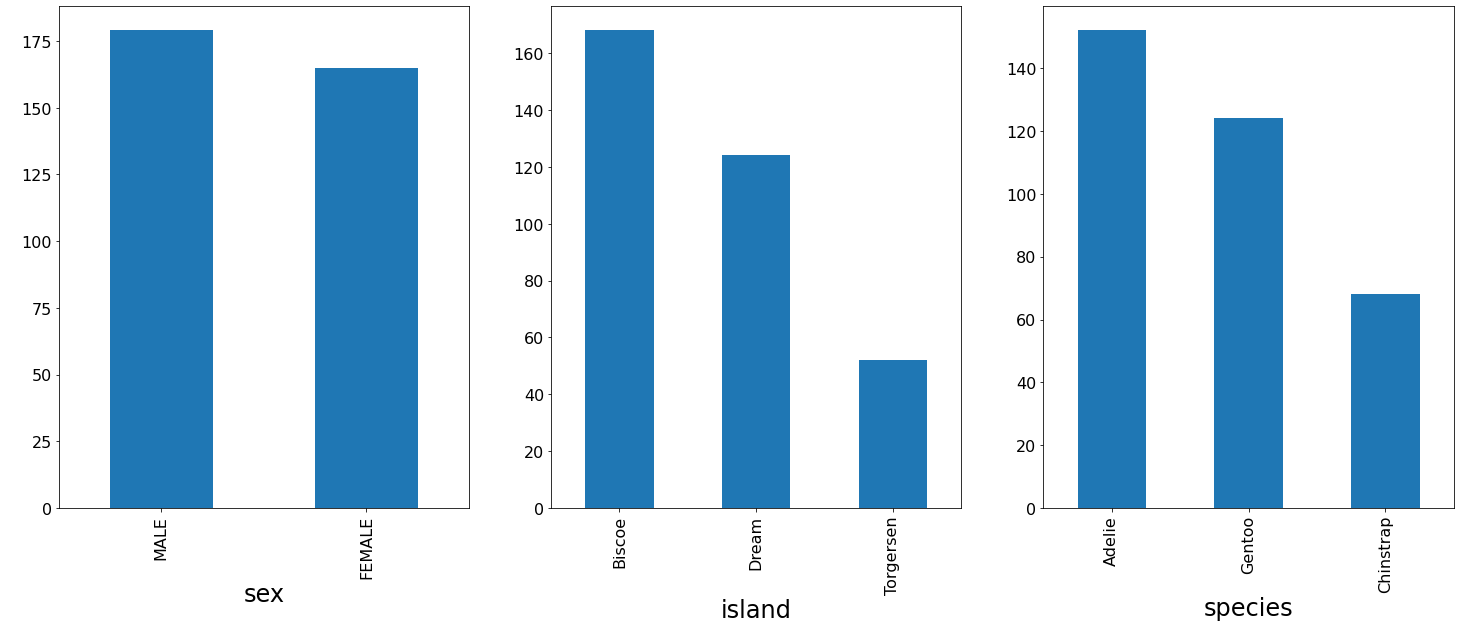

In [ ]:
plt.figure(figsize=(25,120))
i=1
for col in cat_column:
    plt.subplot(11,3,i)
    df[col].value_counts().plot(kind="bar")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(col,fontsize=24)
    plt.ylabel(' ')
    i+=1

**Penjelasan**

Pada visualisasi di atas hanya ditampilkan frekuensi data dari tiap atribut. Dengan demikian, visualisasi tersebut dapat memberikan gambaran perbandingan frekuensi setiap data pada atribut.

<hr>
<hr>
<hr>

# Poin 3

Dari data pada point 2

a. Buatlah data latih dan uji menggunakan minimal 3 teknik sampling yang berbeda dengan persentase data latih dan uji adalah 70:30. Lakukan pengulangan sampling data dengan 3 teknik ini sebanyak 3 kali. Amati dan berikan penjelasan komposisi dan distribusi data latih dan uji pada ketiga percobaan tersebut.

b. Pilih salah satu metode klasifikasi yang sesuai dengan kondisi data yang telah anda analisis pada point 2. Lengkapi alasan pemilihan metode klasifikasi dengan minimal 3 referensi jurnal (diutamakan dari jurnal internasional yang bisa anda cari dari Sciencedirect atau IEEE)

c. Lakukan klasifikasi menggunakan data latih dan uji pada point 4a (pilih salah satu ulangan data untuk tiap teknik sampling). Performansi hasil klasifikasi bisa diuji menggunakan nilai akurasi/presisi/recall. Program untuk klasifikasi bisa menggunakan modul atau library yang sudah ada.

d. Berikan ulasan terhadap hasil klasifikasi yang telah dilakukan

<hr>
<hr>

## Poin 3a

Dari data pada point 2

a. Buatlah data latih dan uji menggunakan minimal 3 teknik sampling yang berbeda dengan persentase data latih dan uji adalah 70:30. Lakukan pengulangan sampling data dengan 3 teknik ini sebanyak 3 kali. Amati dan berikan penjelasan komposisi dan distribusi data latih dan uji pada ketiga percobaan tersebut.

In [ ]:
### Membuat fungsi untuk memudahkan proses pengulangan poin 3a


# fungsi untuk mencetak dimensi data
def show_dimension(df, data_latih, data_uji):
    print("dataset = " + str(df.shape))
    print("data latih = " + str(data_latih.shape))
    print("data uji = " + str(data_uji.shape))


# fungsi untuk membuat plot komposisi data
def show_komposisi(judul_plot, data_latih, data_uji):
    fig, axes = plt.subplots(1, 2, figsize = (30, 30))
    fig.suptitle(judul_plot, fontsize=20)
    fig.tight_layout(pad=15.0)
    # fig.tight_layout(pad=20.0)

    ax1 = data_latih.groupby("species").size().plot.bar(color='orange', grid=False, figsize=(15,5), title="Komposisi Kelas Data Latih", ax=axes[0])
    for container in ax1.containers:
        ax1.bar_label(container)
    ax1.tick_params(axis='x', rotation=0)

    ax2 = data_uji.groupby("species").size().plot.bar(color='orange', grid=False, figsize=(15,5), title="Komposisi Kelas Data Uji", ax=axes[1])
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.tick_params(axis='x', rotation=0)

    plt.show()


# fungsi untuk membuat plot distribusi data
def show_distribusi(judul_plot, data_plot):
    fig, axes = plt.subplots(2, 2, figsize = (15, 10))
    fig.suptitle(judul_plot, fontsize=20)

    axes = axes.ravel()
    for col, ax in zip(num_column, axes):
        sns.histplot(data=data_plot[col], kde=True, stat='frequency', ax=ax)

    plt.show()

### 1. Teknik Sampling: Simple Random Sampling

Teknik random sampling mengambil data secara acak sebanyak yang telah ditentukan. Setiap anggota populasi memiliki peluang yang sama untuk terambil menjadi sampel.

#### Pengulangan 1

In [ ]:
from sklearn.model_selection import train_test_split

sr1_data_latih, sr1_data_uji = train_test_split(df, test_size=.3, random_state=1)
show_dimension(df, sr1_data_latih, sr1_data_uji)

dataset = (344, 7)
data latih = (240, 7)
data uji = (104, 7)


In [ ]:
sr1_data_latih.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,FEMALE
78,Adelie,Torgersen,36.2,16.1,187.0,3550.0,FEMALE
232,Gentoo,Biscoe,45.5,13.7,214.0,4650.0,FEMALE
192,Chinstrap,Dream,49.0,19.5,210.0,3950.0,MALE
325,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,MALE


In [ ]:
sr1_data_uji.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
306,Gentoo,Biscoe,43.4,14.4,218.0,4600.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
291,Gentoo,Biscoe,46.4,15.6,221.0,5000.0,MALE
102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,FEMALE
289,Gentoo,Biscoe,50.7,15.0,223.0,5550.0,MALE


**Komposisi**

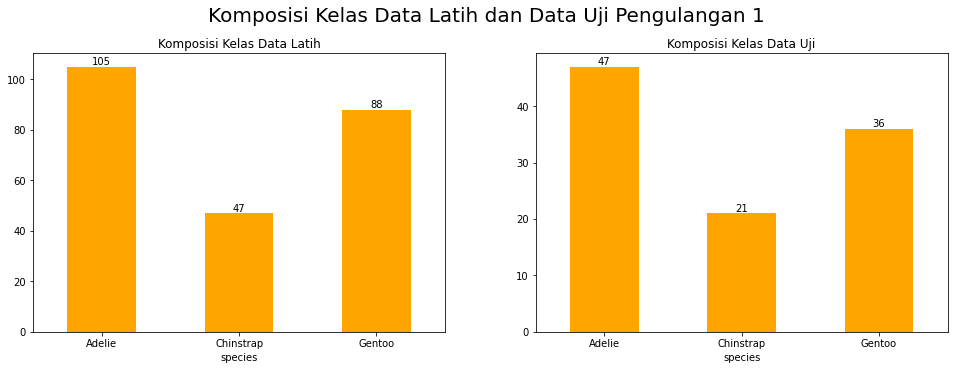

In [ ]:
show_komposisi("Komposisi Kelas Data Latih dan Data Uji Pengulangan 1", sr1_data_latih, sr1_data_uji)

**Distribusi**

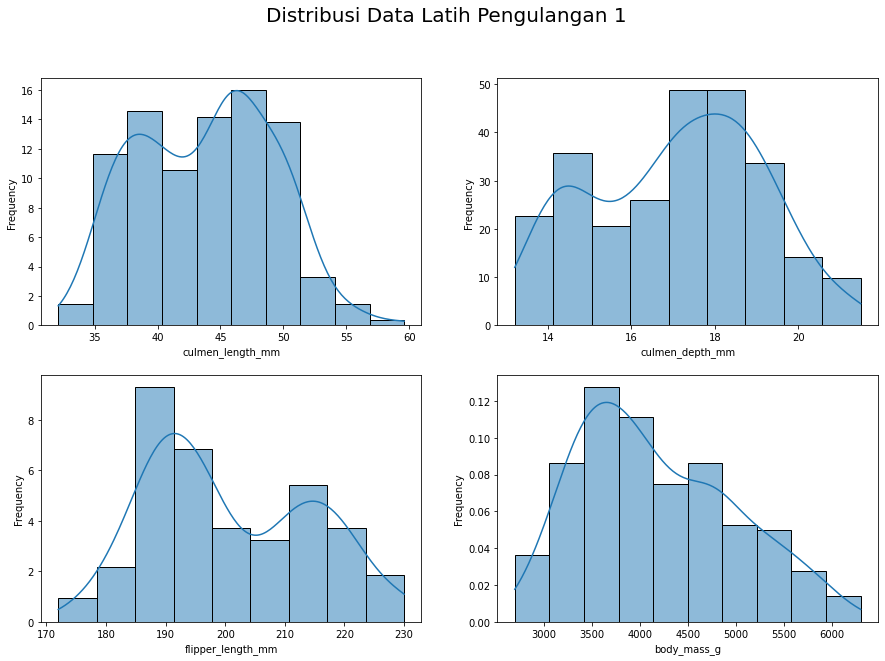

In [ ]:
# Distribusi Data Latih

show_distribusi("Distribusi Data Latih Pengulangan 1", sr1_data_latih)

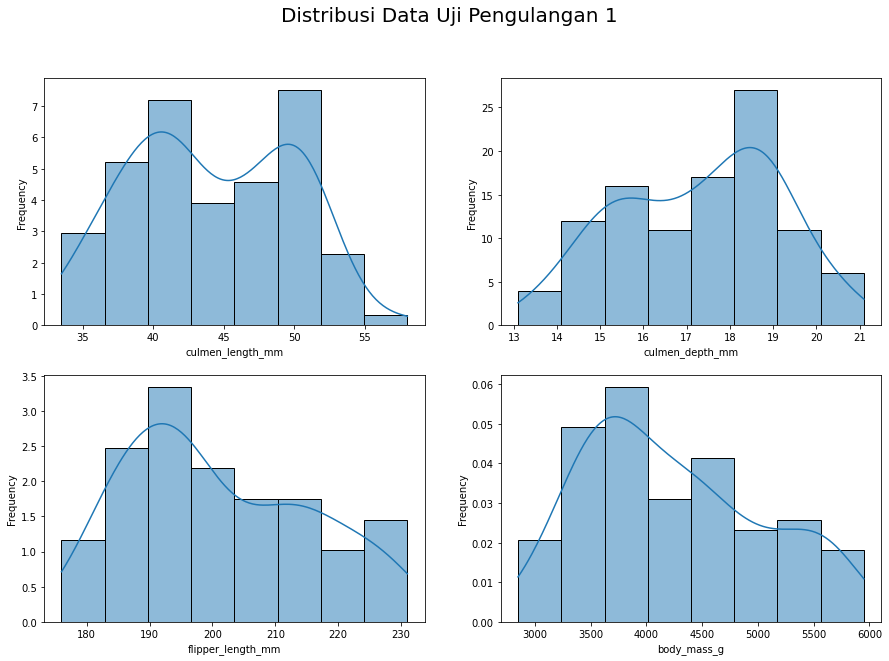

In [ ]:
# Distribusi Data Uji

show_distribusi("Distribusi Data Uji Pengulangan 1", sr1_data_uji)

#### Pengulangan 2

In [ ]:
from sklearn.model_selection import train_test_split

sr2_data_latih, sr2_data_uji = train_test_split(df, test_size=.3, random_state=102)
show_dimension(df, sr2_data_latih, sr2_data_uji)

dataset = (344, 7)
data latih = (240, 7)
data uji = (104, 7)


In [ ]:
sr2_data_latih.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
205,Chinstrap,Dream,50.7,19.7,203.0,4050.0,MALE
85,Adelie,Dream,41.3,20.3,194.0,3550.0,MALE
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,MALE
118,Adelie,Torgersen,35.7,17.0,189.0,3350.0,FEMALE
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,MALE


In [ ]:
sr2_data_uji.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
32,Adelie,Dream,39.5,17.8,188.0,3300.0,FEMALE
67,Adelie,Biscoe,41.1,19.1,188.0,4100.0,MALE
273,Gentoo,Biscoe,50.1,15.0,225.0,5000.0,MALE
119,Adelie,Torgersen,41.1,18.6,189.0,3325.0,MALE
278,Gentoo,Biscoe,43.2,14.5,208.0,4450.0,FEMALE


**Komposisi**

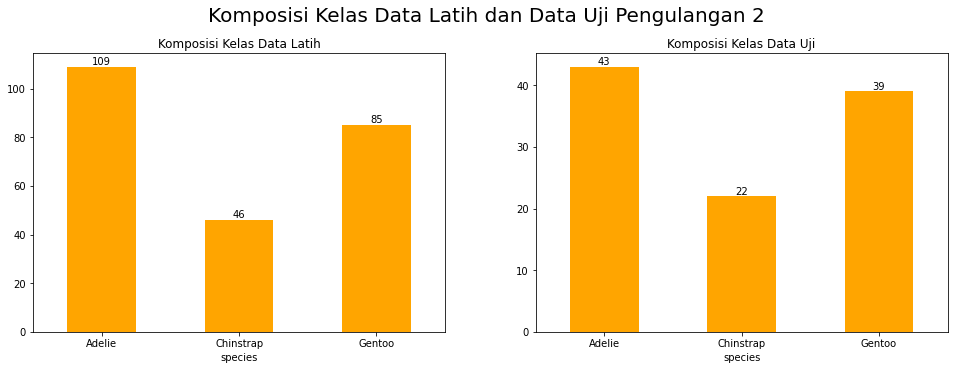

In [ ]:
show_komposisi("Komposisi Kelas Data Latih dan Data Uji Pengulangan 2", sr2_data_latih, sr2_data_uji)

**Distribusi**

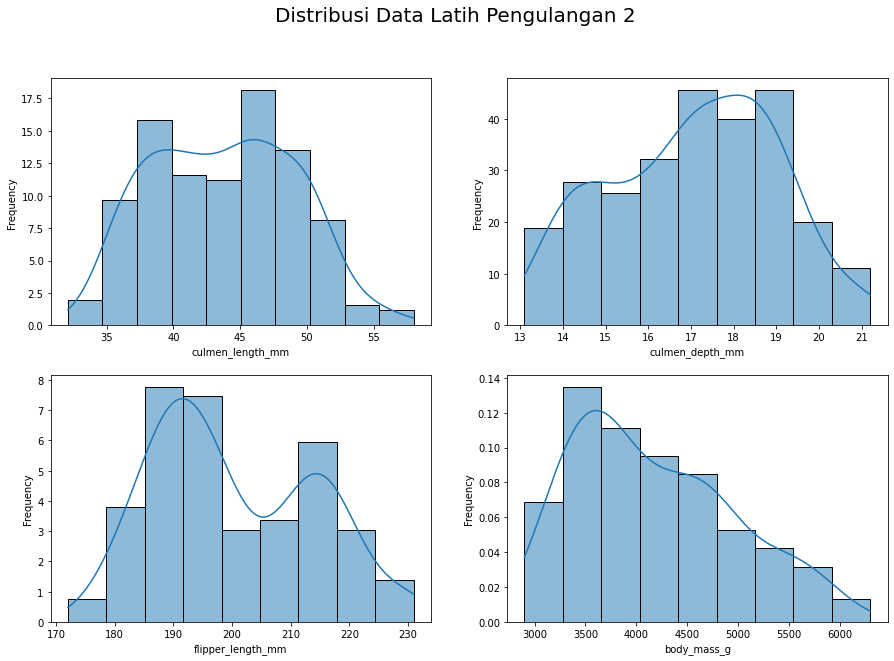

In [ ]:
# Distribusi Data Latih

show_distribusi("Distribusi Data Latih Pengulangan 2", sr2_data_latih)

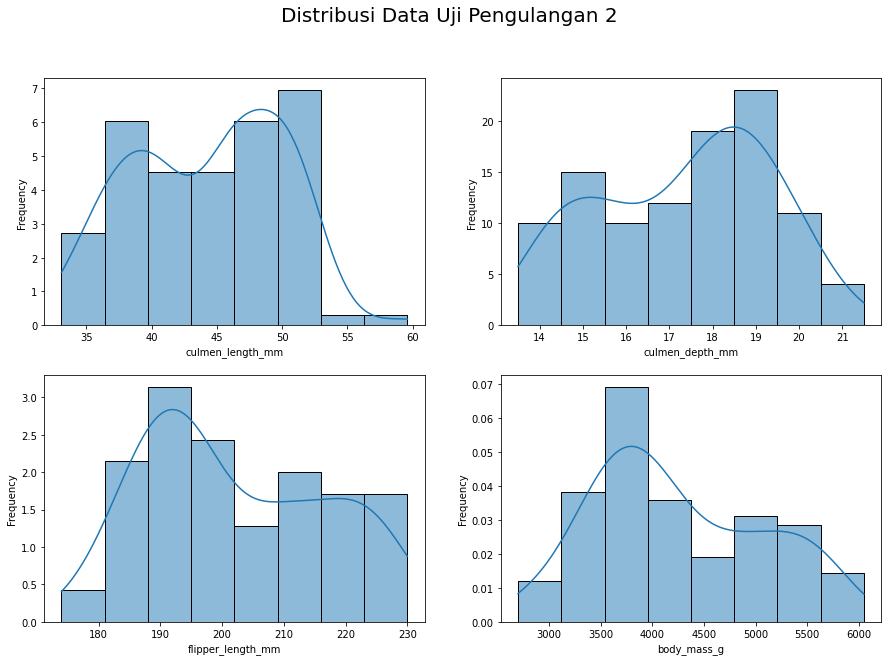

In [ ]:
# Distribusi Data Uji

show_distribusi("Distribusi Data Uji Pengulangan 2", sr2_data_uji)

#### Pengulangan 3

In [ ]:
from sklearn.model_selection import train_test_split

sr3_data_latih, sr3_data_uji = train_test_split(df, test_size=.3, random_state=203)
show_dimension(df, sr3_data_latih, sr3_data_uji)

dataset = (344, 7)
data latih = (240, 7)
data uji = (104, 7)


In [ ]:
sr3_data_latih.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,FEMALE
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,MALE
160,Chinstrap,Dream,46.0,18.9,195.0,4150.0,FEMALE
86,Adelie,Dream,36.3,19.5,190.0,3800.0,MALE
284,Gentoo,Biscoe,45.8,14.2,219.0,4700.0,FEMALE


In [ ]:
sr3_data_uji.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
131,Adelie,Torgersen,43.1,19.2,197.0,3500.0,MALE
315,Gentoo,Biscoe,50.8,15.7,226.0,5200.0,MALE
47,Adelie,Dream,37.5,18.9,179.0,2975.0,MALE
88,Adelie,Dream,38.3,19.2,189.0,3950.0,MALE
298,Gentoo,Biscoe,45.2,13.8,215.0,4750.0,FEMALE


**Komposisi**

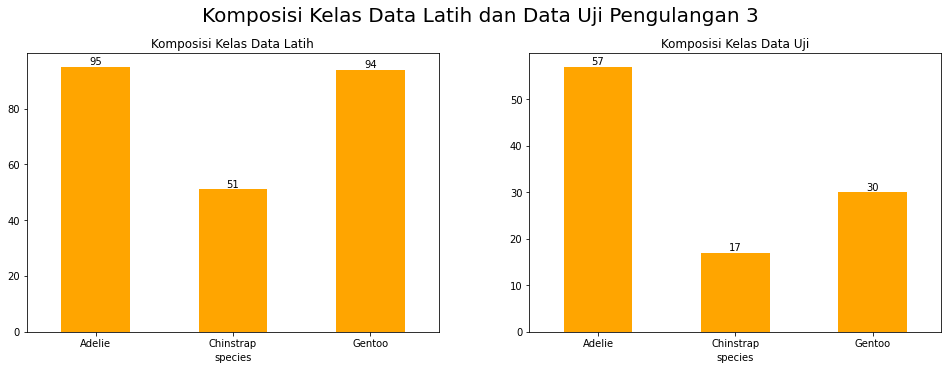

In [ ]:
show_komposisi("Komposisi Kelas Data Latih dan Data Uji Pengulangan 3", sr3_data_latih, sr3_data_uji)

**Distribusi**

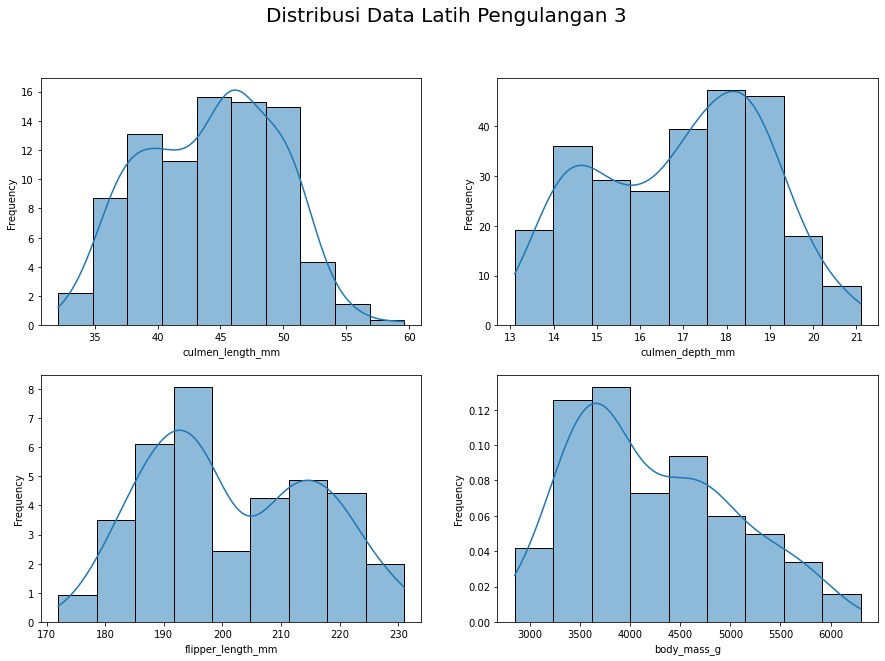

In [ ]:
# Distribusi Data Latih

show_distribusi("Distribusi Data Latih Pengulangan 3", sr3_data_latih)

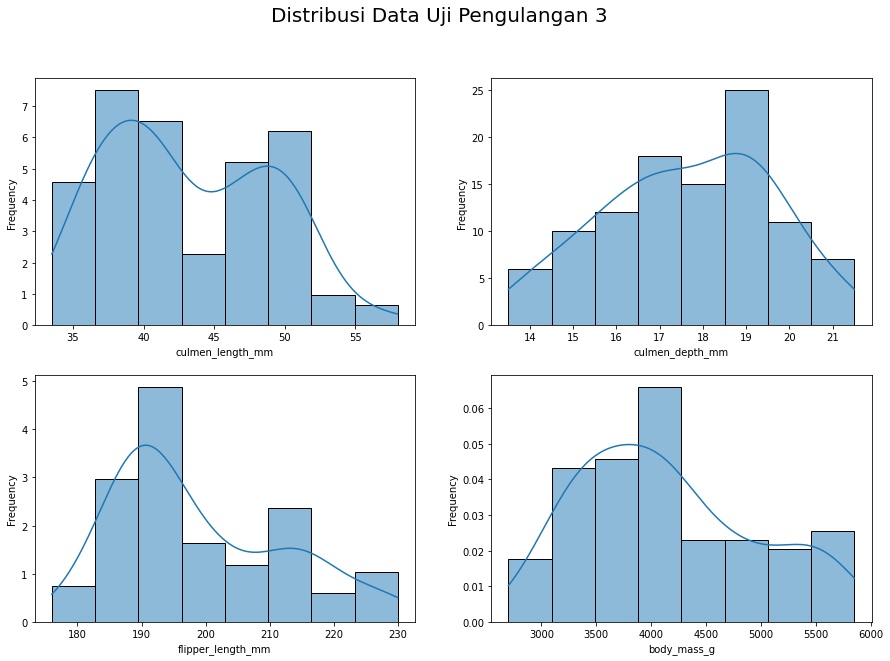

In [ ]:
# Distribusi Data Uji

show_distribusi("Distribusi Data Uji Pengulangan 3", sr3_data_uji)

<hr>

### 2. Teknik Sampling: Proportionate Stratified Random Sampling

Teknik proportionate stratified random sampling mengambil sampel untuk tiap kelas secara random sesuai proporsi. Teknik ini digunakan untuk mengurangi pengaruh faktor heterogen dan melakukan pembagian elemen-elemen ke dalam strata.

In [ ]:
df.groupby("species").size()

species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64

In [ ]:
# Melihat proporsi pembagian data latih dan data uji sesuai strata
for i in df.groupby("species").size().index:
    temp_size = df.groupby("species").size()[i]
    print("{}  \t| Jumlah Data = {} \t| Data Latih = {} \t| Data Uji = {}".format(i, temp_size, round(temp_size*0.7), round(temp_size*0.3)))

Adelie  	| Jumlah Data = 152 	| Data Latih = 106 	| Data Uji = 46
Chinstrap  	| Jumlah Data = 68 	| Data Latih = 48 	| Data Uji = 20
Gentoo  	| Jumlah Data = 124 	| Data Latih = 87 	| Data Uji = 37


#### Pengulangan 1

In [ ]:
from sklearn.model_selection import train_test_split

kelas = df['species']
st1_data_latih, st1_data_uji = train_test_split(df, test_size=.3, random_state=1, stratify=kelas)
show_dimension(df, st1_data_latih, st1_data_uji)

dataset = (344, 7)
data latih = (240, 7)
data uji = (104, 7)


In [ ]:
st1_data_latih.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
33,Adelie,Dream,40.9,18.9,184.0,3900.0,MALE
231,Gentoo,Biscoe,49.0,16.1,216.0,5550.0,MALE
41,Adelie,Dream,40.8,18.4,195.0,3900.0,MALE
118,Adelie,Torgersen,35.7,17.0,189.0,3350.0,FEMALE
40,Adelie,Dream,36.5,18.0,182.0,3150.0,FEMALE


In [ ]:
st1_data_uji.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,MALE
320,Gentoo,Biscoe,48.5,15.0,219.0,4850.0,FEMALE
167,Chinstrap,Dream,50.5,19.6,201.0,4050.0,MALE
252,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,FEMALE
171,Chinstrap,Dream,49.2,18.2,195.0,4400.0,MALE


**Komposisi**

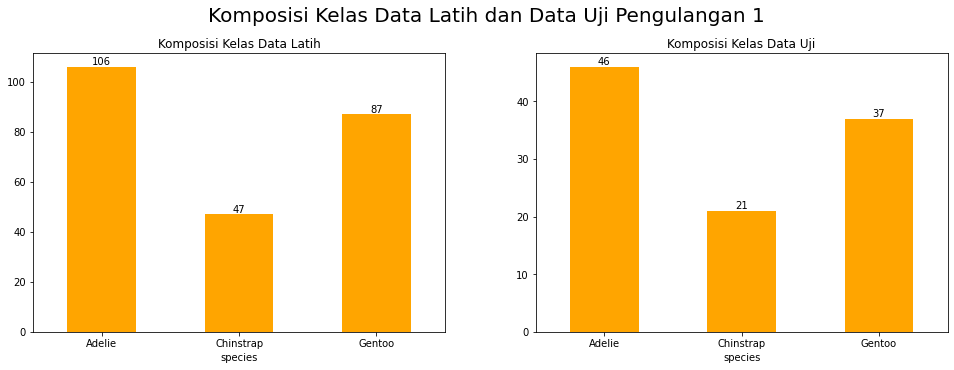

In [ ]:
show_komposisi("Komposisi Kelas Data Latih dan Data Uji Pengulangan 1", st1_data_latih, st1_data_uji)

**Distribusi**

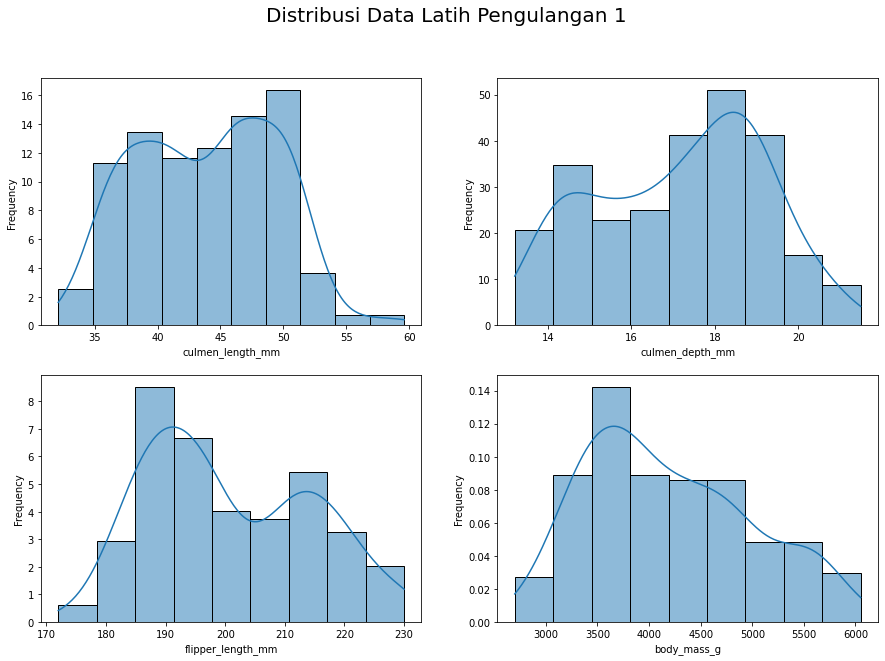

In [ ]:
# Distribusi Data Latih

show_distribusi("Distribusi Data Latih Pengulangan 1", st1_data_latih)

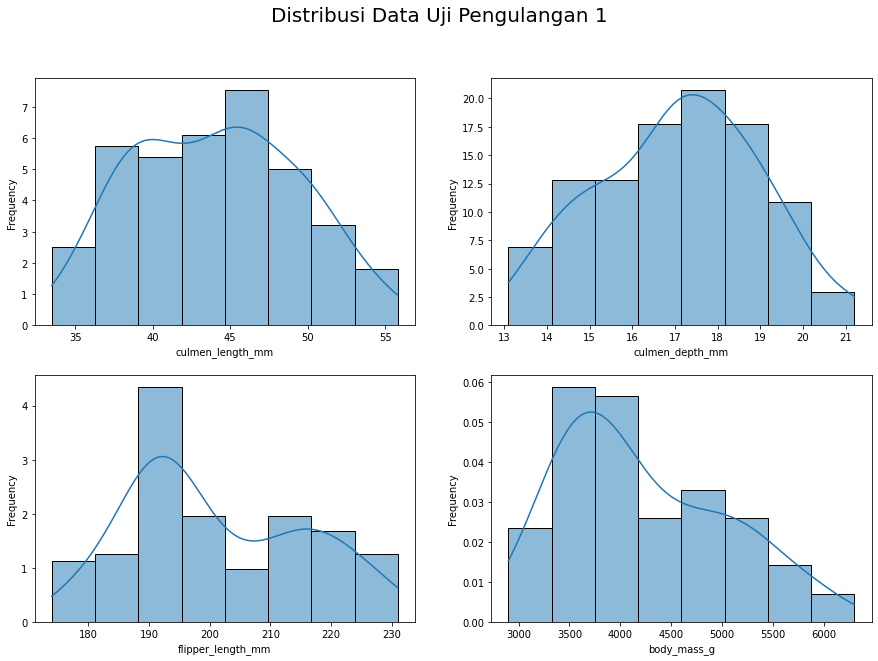

In [ ]:
# Distribusi Data Uji

show_distribusi("Distribusi Data Uji Pengulangan 1", st1_data_uji)

#### Pengulangan 2

In [ ]:
from sklearn.model_selection import train_test_split

kelas = df['species']
st2_data_latih, st2_data_uji = train_test_split(df, test_size=.3, random_state=102, stratify=kelas)
show_dimension(df, st2_data_latih, st2_data_uji)

dataset = (344, 7)
data latih = (240, 7)
data uji = (104, 7)


In [ ]:
st2_data_latih.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
84,Adelie,Dream,37.3,17.8,191.0,3350.0,FEMALE
211,Chinstrap,Dream,45.6,19.4,194.0,3525.0,FEMALE
24,Adelie,Biscoe,38.8,17.2,180.0,3800.0,MALE
186,Chinstrap,Dream,49.7,18.6,195.0,3600.0,MALE
118,Adelie,Torgersen,35.7,17.0,189.0,3350.0,FEMALE


In [ ]:
st2_data_uji.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
270,Gentoo,Biscoe,46.6,14.2,210.0,4850.0,FEMALE
75,Adelie,Torgersen,42.8,18.5,195.0,4250.0,MALE
131,Adelie,Torgersen,43.1,19.2,197.0,3500.0,MALE
81,Adelie,Torgersen,42.9,17.6,196.0,4700.0,MALE
158,Chinstrap,Dream,46.1,18.2,178.0,3250.0,FEMALE


**Komposisi**

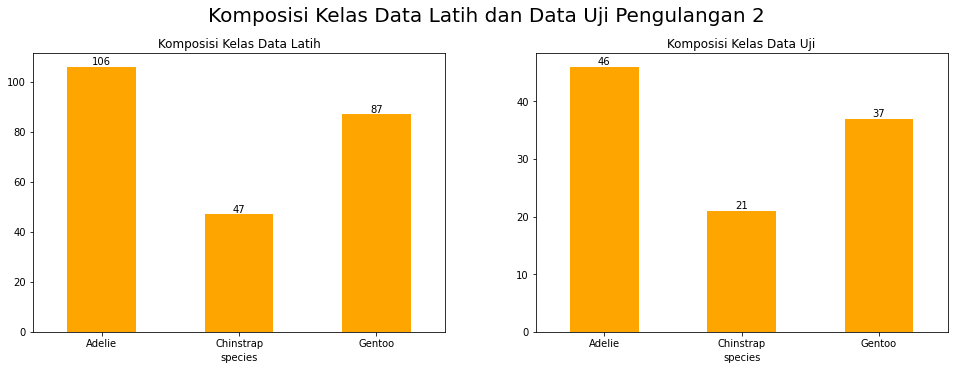

In [ ]:
show_komposisi("Komposisi Kelas Data Latih dan Data Uji Pengulangan 2", st2_data_latih, st2_data_uji)

**Distribusi**

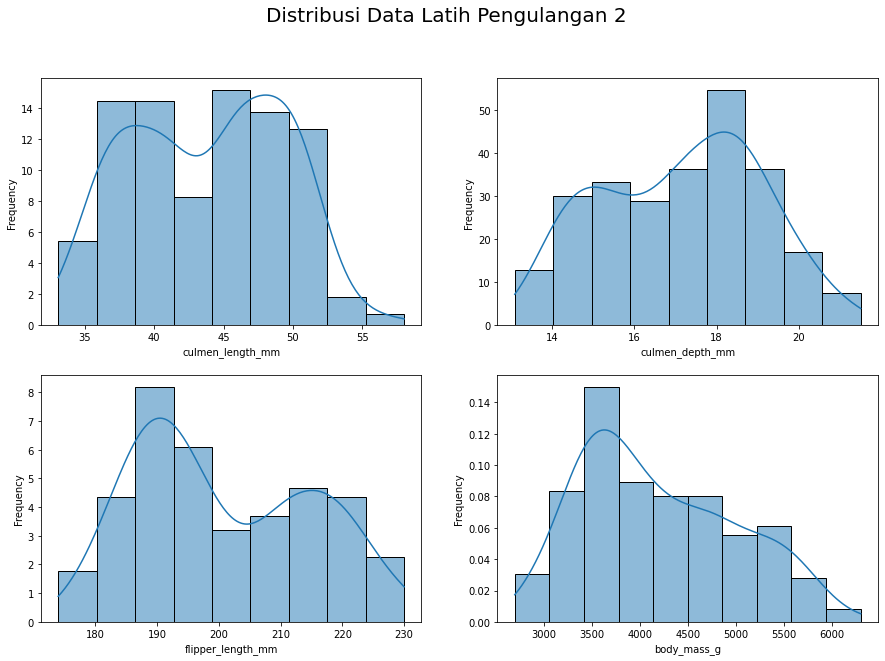

In [ ]:
# Distribusi Data Latih

show_distribusi("Distribusi Data Latih Pengulangan 2", st2_data_latih)

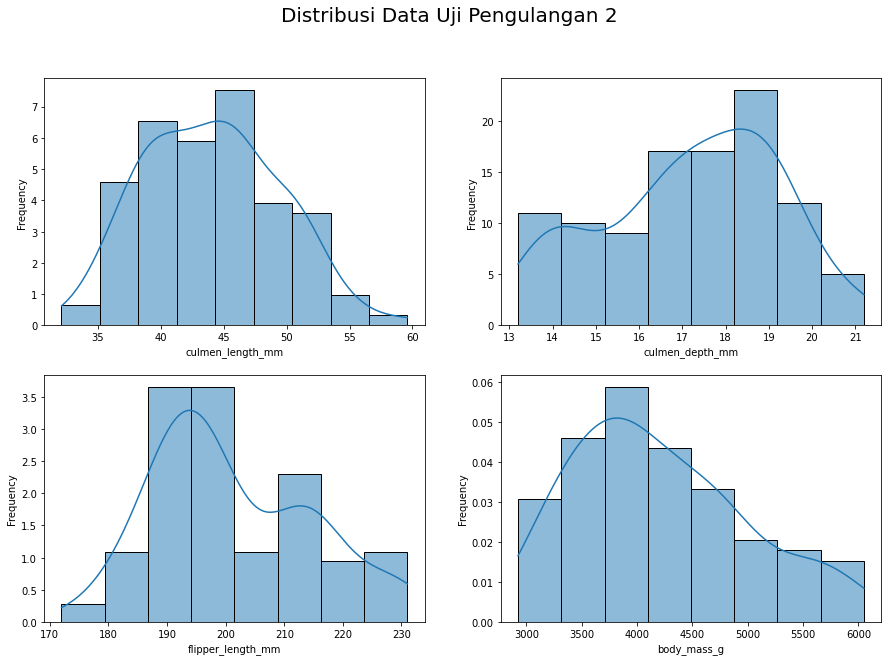

In [ ]:
# Distribusi Data Uji

show_distribusi("Distribusi Data Uji Pengulangan 2", st2_data_uji)

#### Pengulangan 3

In [ ]:
from sklearn.model_selection import train_test_split

kelas = df['species']
st3_data_latih, st3_data_uji = train_test_split(df, test_size=.3, random_state=203, stratify=kelas)
show_dimension(df, st3_data_latih, st3_data_uji)

dataset = (344, 7)
data latih = (240, 7)
data uji = (104, 7)


In [ ]:
st3_data_latih.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
105,Adelie,Biscoe,39.7,18.9,184.0,3550.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
328,Gentoo,Biscoe,43.3,14.0,208.0,4575.0,FEMALE
189,Chinstrap,Dream,52.0,20.7,210.0,4800.0,MALE
144,Adelie,Dream,37.3,16.8,192.0,3000.0,FEMALE


In [ ]:
st3_data_uji.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
82,Adelie,Torgersen,36.7,18.8,187.0,3800.0,FEMALE
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,MALE
89,Adelie,Dream,38.9,18.8,190.0,3600.0,FEMALE
238,Gentoo,Biscoe,46.2,14.5,209.0,4800.0,FEMALE
128,Adelie,Torgersen,39.0,17.1,191.0,3050.0,FEMALE


**Komposisi**

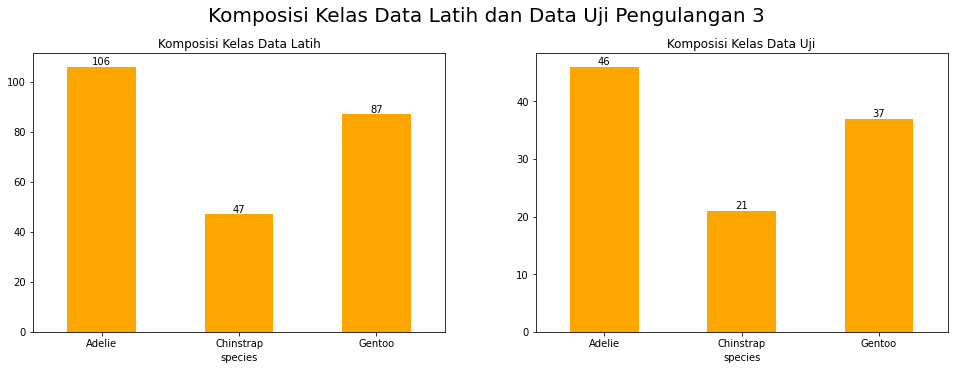

In [ ]:
show_komposisi("Komposisi Kelas Data Latih dan Data Uji Pengulangan 3", st3_data_latih, st3_data_uji)

**Distribusi**

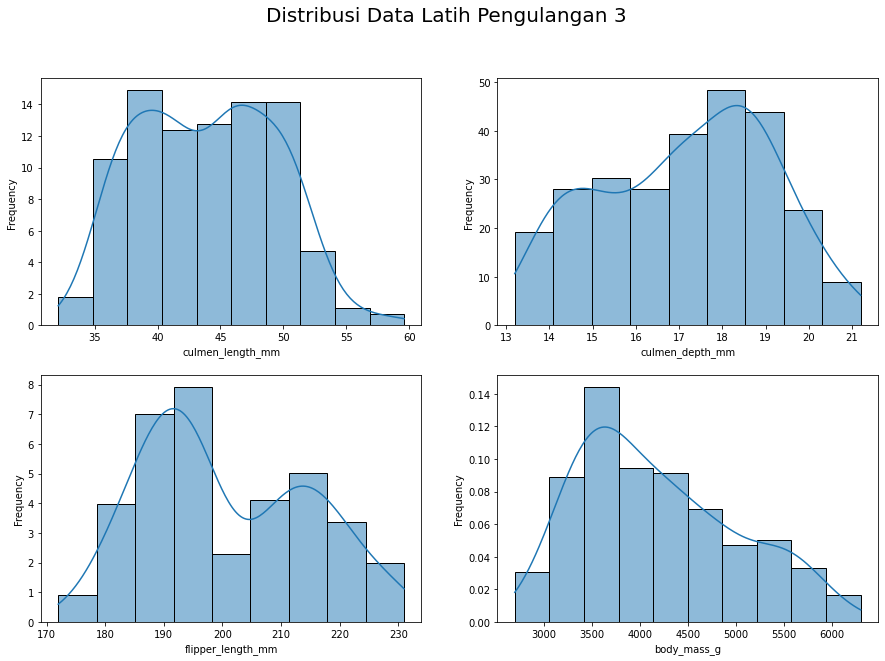

In [ ]:
# Distribusi Data Latih

show_distribusi("Distribusi Data Latih Pengulangan 3", st3_data_latih)

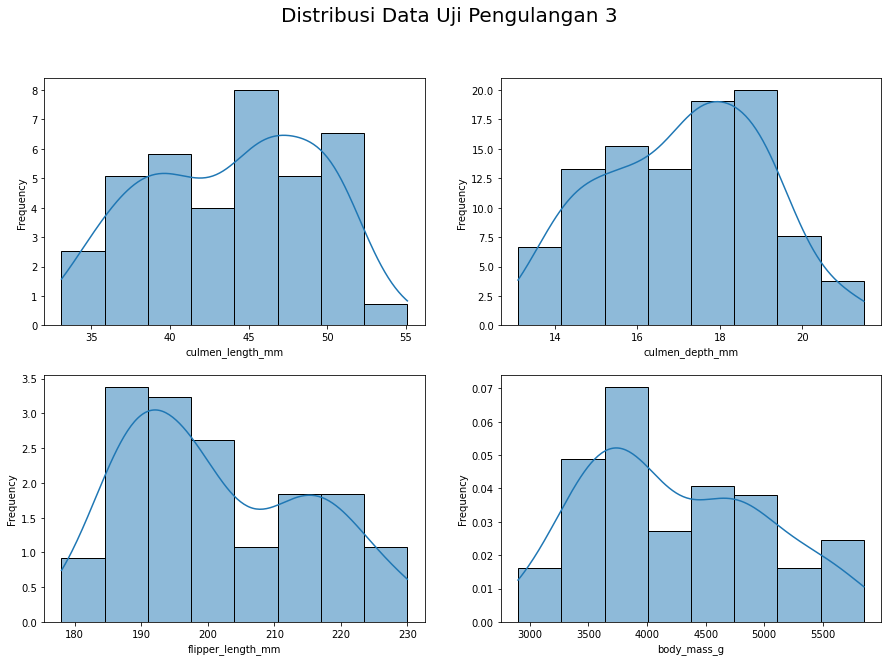

In [ ]:
# Distribusi Data Uji

show_distribusi("Distribusi Data Uji Pengulangan 3", st3_data_uji)

<hr>

### 3. Teknik Sampling: Systematic Random Sampling

Teknik systematic random sampling mengambil sampel pertama dari populasi secara acak, kemudian sampel berikutnya diambil berdasarkan interval / jarak tertentu yang tetap.

In [ ]:
# Fungsi untuk membagi data latih dan data uji menggunakan teknik systematic random sampling
def train_test_split_systematic(df, test_size, step, random_state):
    np.random.seed(random_state)  # sama dengan random_state pada sklearn.train_test_split
    random_num = np.random.randint(df.shape[0])  # generate angka random dalam interval ukuran dataset
    size_datauji = int(np.ceil(df.shape[0] * test_size))

    # mendapatkan index data uji sesuai interval, sebanyak test_size% dataset
    index_uji = np.arange(start=random_num, stop=random_num+step*size_datauji, step=step)

    # reset index jika melebihi atau sama dengan ukuran dataset
    index_uji[index_uji >= df.shape[0]] %= df.shape[0]

    # simpan dalam variabel baru
    data_latih = df.copy()
    data_uji = data_latih.iloc[index_uji]
    data_latih.drop(index_uji, inplace=True)

    return data_latih, data_uji

#### Pengulangan 1

In [ ]:
sy1_data_latih, sy1_data_uji = train_test_split_systematic(df, test_size=.3, step=5, random_state=1)
show_dimension(df, sy1_data_latih, sy1_data_uji)

dataset = (344, 7)
data latih = (240, 7)
data uji = (104, 7)


In [ ]:
sy1_data_latih.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
sy1_data_uji.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
37,Adelie,Dream,42.2,18.5,180.0,3550.0,FEMALE
42,Adelie,Dream,36.0,18.5,186.0,3100.0,FEMALE
47,Adelie,Dream,37.5,18.9,179.0,2975.0,MALE
52,Adelie,Biscoe,35.0,17.9,190.0,3450.0,FEMALE
57,Adelie,Biscoe,40.6,18.8,193.0,3800.0,MALE


**Komposisi**

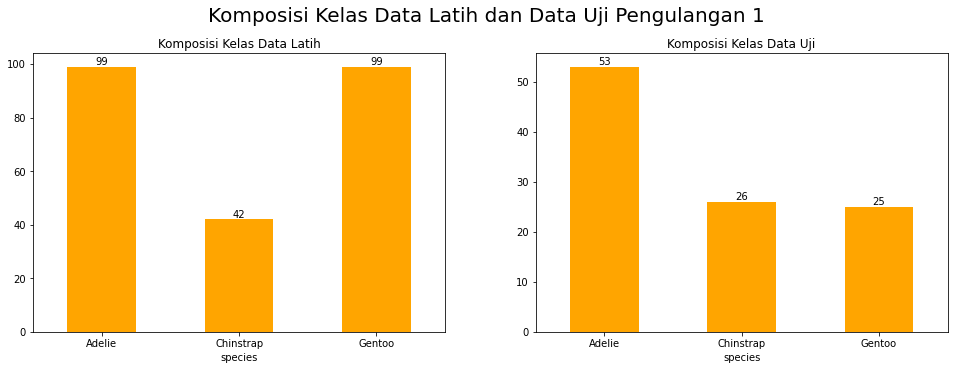

In [ ]:
show_komposisi("Komposisi Kelas Data Latih dan Data Uji Pengulangan 1", sy1_data_latih, sy1_data_uji)

**Distribusi**

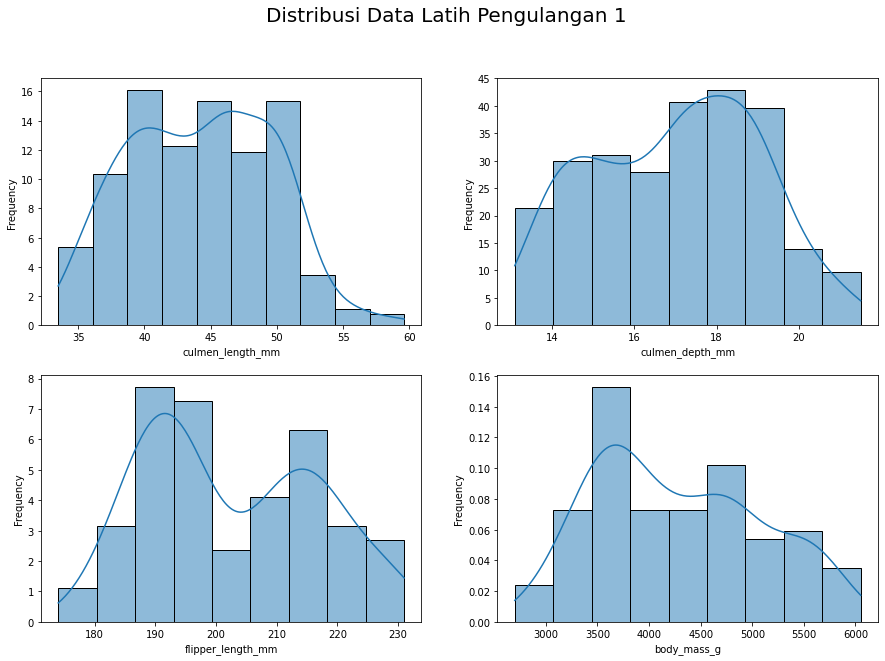

In [ ]:
# Distribusi Data Latih

show_distribusi("Distribusi Data Latih Pengulangan 1", sy1_data_latih)

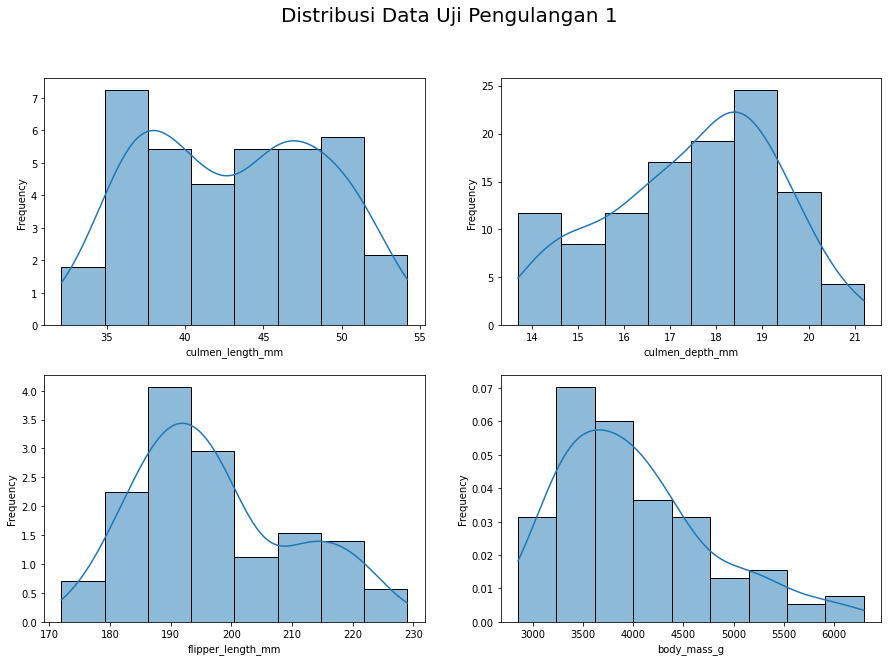

In [ ]:
# Distribusi Data Uji

show_distribusi("Distribusi Data Uji Pengulangan 1", sy1_data_uji)

#### Pengulangan 2

In [ ]:
sy2_data_latih, sy2_data_uji = train_test_split_systematic(df, test_size=.3, step=5, random_state=102)
show_dimension(df, sy2_data_latih, sy2_data_uji)

dataset = (344, 7)
data latih = (240, 7)
data uji = (104, 7)


In [ ]:
sy2_data_latih.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE


In [ ]:
sy2_data_uji.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
256,Gentoo,Biscoe,42.6,13.7,213.0,4950.0,FEMALE
261,Gentoo,Biscoe,49.6,16.0,225.0,5700.0,MALE
266,Gentoo,Biscoe,45.5,13.9,210.0,4200.0,FEMALE
271,Gentoo,Biscoe,48.5,14.1,220.0,5300.0,MALE
276,Gentoo,Biscoe,43.8,13.9,208.0,4300.0,FEMALE


**Komposisi**

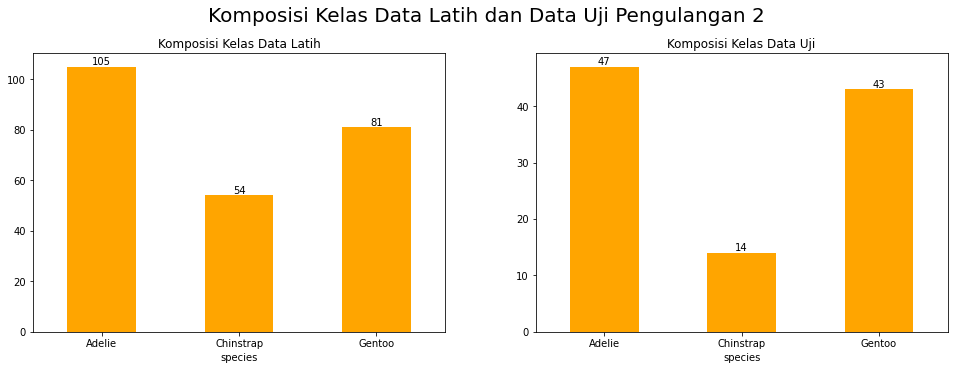

In [ ]:
show_komposisi("Komposisi Kelas Data Latih dan Data Uji Pengulangan 2", sy2_data_latih, sy2_data_uji)

**Distribusi**

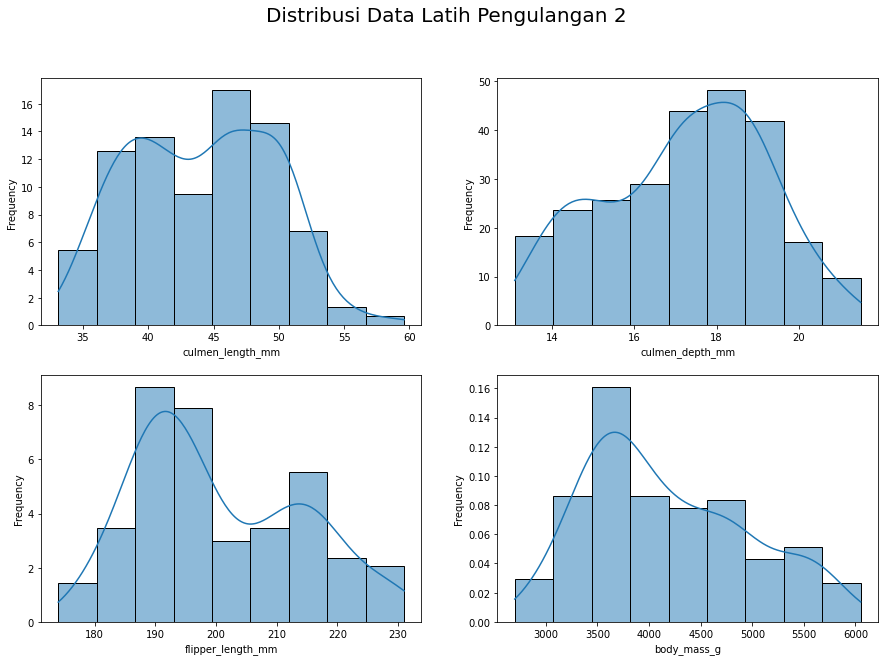

In [ ]:
# Distribusi Data Latih

show_distribusi("Distribusi Data Latih Pengulangan 2", sy2_data_latih)

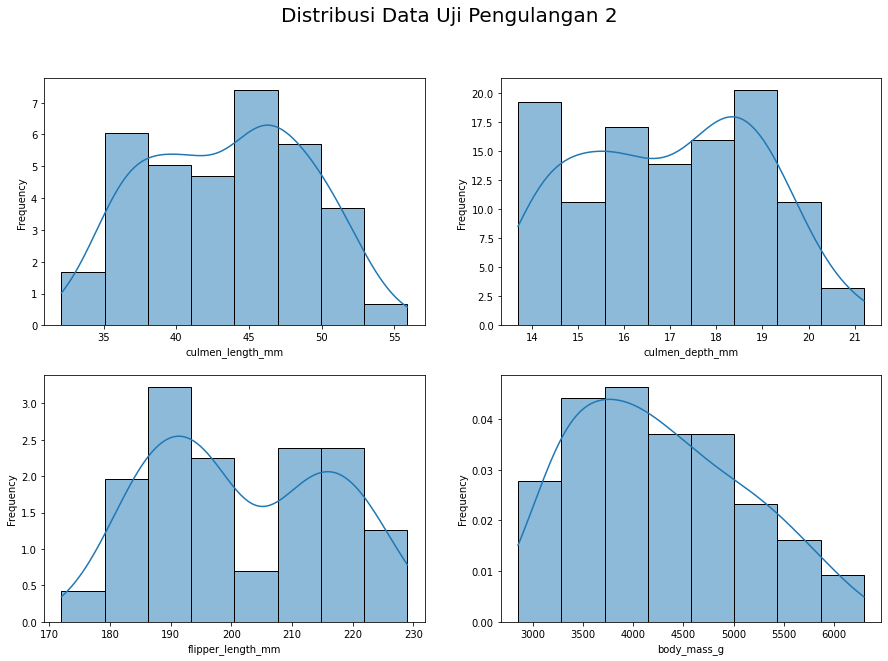

In [ ]:
# Distribusi Data Uji

show_distribusi("Distribusi Data Uji Pengulangan 2", sy2_data_uji)

#### Pengulangan 3

In [ ]:
sy3_data_latih, sy3_data_uji = train_test_split_systematic(df, test_size=.3, step=7, random_state=102)
show_dimension(df, sy3_data_latih, sy3_data_uji)

dataset = (344, 7)
data latih = (240, 7)
data uji = (104, 7)


In [ ]:
sy3_data_latih.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE


In [ ]:
sy3_data_uji.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
256,Gentoo,Biscoe,42.6,13.7,213.0,4950.0,FEMALE
263,Gentoo,Biscoe,49.6,15.0,216.0,4750.0,MALE
270,Gentoo,Biscoe,46.6,14.2,210.0,4850.0,FEMALE
277,Gentoo,Biscoe,45.5,15.0,220.0,5000.0,MALE
284,Gentoo,Biscoe,45.8,14.2,219.0,4700.0,FEMALE


**Komposisi**

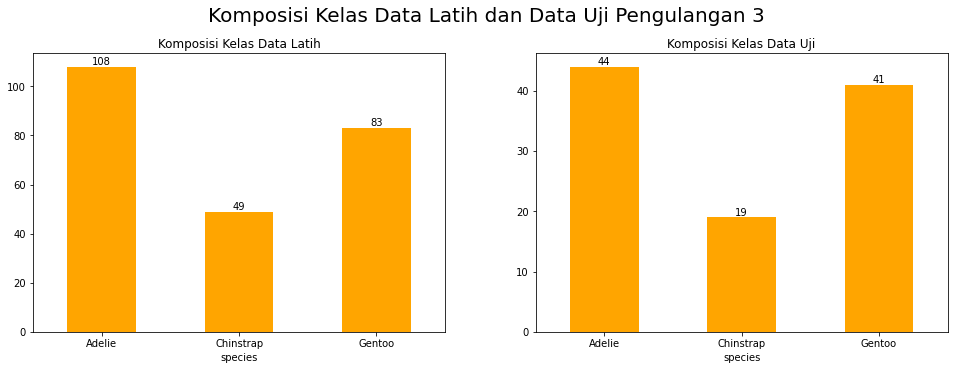

In [ ]:
show_komposisi("Komposisi Kelas Data Latih dan Data Uji Pengulangan 3", sy3_data_latih, sy3_data_uji)

**Distribusi**

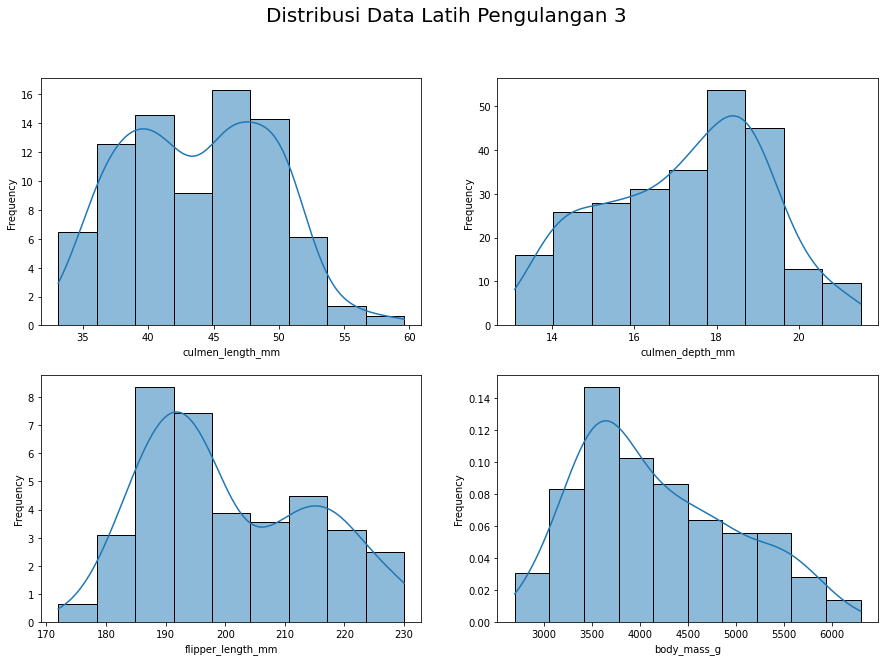

In [ ]:
# Distribusi Data Latih

show_distribusi("Distribusi Data Latih Pengulangan 3", sy3_data_latih)

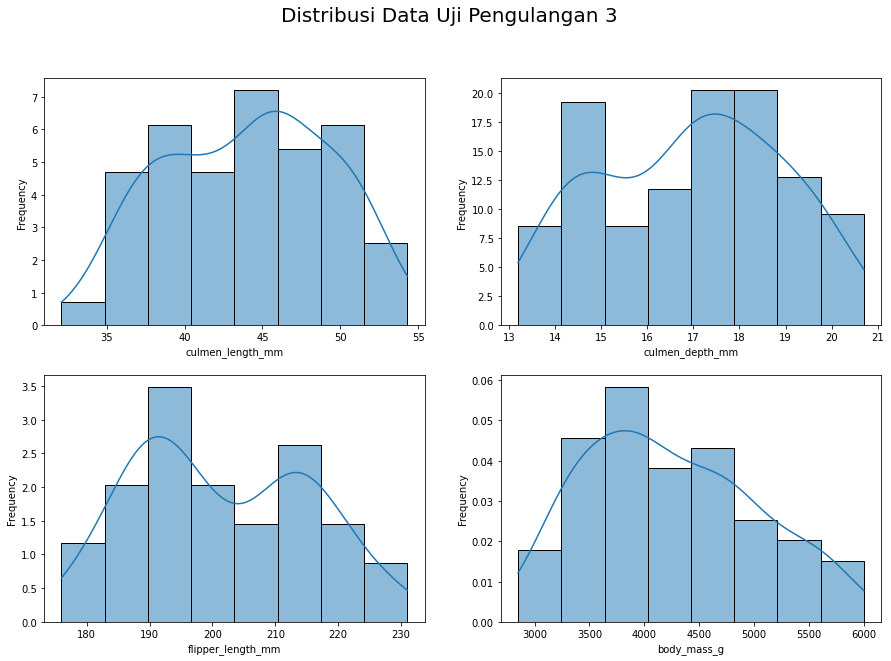

In [ ]:
# Distribusi Data Uji

show_distribusi("Distribusi Data Uji Pengulangan 3", sy3_data_uji)

<hr>
<hr>

## Poin 3b - 3d

Dari data pada point 2

b. Pilih salah satu metode klasifikasi yang sesuai dengan kondisi data yang telah anda analisis pada point 2. Lengkapi alasan pemilihan metode klasifikasi dengan minimal 3 referensi jurnal (diutamakan dari jurnal internasional yang bisa anda cari dari Sciencedirect atau IEEE)

c. Lakukan klasifikasi menggunakan data latih dan uji pada point 3a (pilih salah satu ulangan data untuk tiap teknik sampling). Performansi hasil klasifikasi bisa diuji menggunakan nilai akurasi/presisi/recall. Program untuk klasifikasi bisa menggunakan modul atau library yang sudah ada.

d. Berikan ulasan terhadap hasil klasifikasi yang telah dilakukan

3 Referensi Jurnal (masing-masing cari 1 ye)

- subject: KNN
- buat resume singkat: isinya kyk dia tujuan penelitiannya ngapain, trus datanya kyk gimana gitu aja. Nnti bsa dimasukin ke penjelasan


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# Fungsi untuk encoding data kategorikal, yaitu fitur island, sex
def encoding_kategorikal(data_latih, data_uji):
    # fitur island
    data_latih['island'] = np.where(data_latih['island'] == 'Torgersen', 0, data_latih['island'])
    data_latih['island'] = np.where(data_latih['island'] == 'Biscoe', 1, data_latih['island'])
    data_latih['island'] = np.where(data_latih['island'] == 'Dream', 2, data_latih['island'])

    data_uji['island'] = np.where(data_uji['island'] == 'Torgersen', 0, data_uji['island'])
    data_uji['island'] = np.where(data_uji['island'] == 'Biscoe', 1, data_uji['island'])
    data_uji['island'] = np.where(data_uji['island'] == 'Dream', 2, data_uji['island'])

    # fitur sex
    data_latih['sex'] = np.where(data_latih['sex'] == 'MALE', 0, data_latih['sex'])
    data_latih['sex'] = np.where(data_latih['sex'] == 'FEMALE', 1, data_latih['sex'])

    data_uji['sex'] = np.where(data_uji['sex'] == 'MALE', 0, data_uji['sex'])
    data_uji['sex'] = np.where(data_uji['sex'] == 'FEMALE', 1, data_uji['sex'])

    return data_latih, data_uji

#### Klasifikasi untuk Data dengan Teknik Sampling Simple Random Sampling

Data yang digunakan ialah data pengulangan 1

Tanpa Normalisasi

In [ ]:
sr1_data_latih, sr1_data_uji = train_test_split(df, test_size=.3, random_state=1)
show_dimension(df, sr1_data_latih, sr1_data_uji)

dataset = (344, 7)
data latih = (240, 7)
data uji = (104, 7)


In [ ]:
# Encoding data kategorikal, yaitu fitur island, sex
sr1_data_latih, sr1_data_uji = encoding_kategorikal(sr1_data_latih, sr1_data_uji)

# memisahkan fitur dengan kelas
sr1_data_latih_label = sr1_data_latih.pop("species")
sr1_data_uji_label = sr1_data_uji.pop("species")

In [ ]:
# Algoritma klasifikasi KNN dengan neighbors 3
knn_sr = KNeighborsClassifier(n_neighbors=3)
knn_sr.fit(sr1_data_latih, sr1_data_latih_label)

# Prediksi KNN
sr_prediksi = knn_sr.predict(sr1_data_uji)
sr_akurasi = ((sum(sr_prediksi==sr1_data_uji_label)) / len(sr1_data_uji_label)) * 100
print("Akurasi : ", sr_akurasi,"%")

Akurasi :  75.96153846153845 %


Dengan Normalisasi

In [ ]:
sr1_data_latih, sr1_data_uji = train_test_split(df, test_size=.3, random_state=1)
show_dimension(df, sr1_data_latih, sr1_data_uji)

dataset = (344, 7)
data latih = (240, 7)
data uji = (104, 7)


In [ ]:
# Melakukan normalisasi menggunakan z-score
sr_scaler = StandardScaler()

fitur_numerik = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
sr1_data_latih[fitur_numerik] = sr_scaler.fit_transform(sr1_data_latih[fitur_numerik])
sr1_data_uji[fitur_numerik] = sr_scaler.fit_transform(sr1_data_uji[fitur_numerik])


# Encoding data kategorikal, yaitu fitur island, sex
sr1_data_latih, sr1_data_uji = encoding_kategorikal(sr1_data_latih, sr1_data_uji)

# memisahkan fitur dengan kelas
sr1_data_latih_label = sr1_data_latih.pop("species")
sr1_data_uji_label = sr1_data_uji.pop("species")

In [ ]:
# Algoritma klasifikasi KNN dengan neighbors 3
knn_sr_norm = KNeighborsClassifier(n_neighbors=3)
knn_sr_norm.fit(sr1_data_latih, sr1_data_latih_label)

# Prediksi KNN
sr_prediksi_norm = knn_sr_norm.predict(sr1_data_uji)
sr_akurasi_norm = ((sum(sr_prediksi_norm==sr1_data_uji_label)) / len(sr1_data_uji_label)) * 100
print("Akurasi : ", sr_akurasi_norm,"%")

Akurasi :  100.0 %


#### Klasifikasi untuk Data dengan Teknik Sampling Proportionate Stratified Random Sampling

Data yang digunakan ialah data pengulangan 1

Tanpa Normalisasi

In [ ]:
kelas = df['species']
st1_data_latih, st1_data_uji = train_test_split(df, test_size=.3, random_state=1, stratify=kelas)

show_dimension(df, st1_data_latih, st1_data_uji)

dataset = (344, 7)
data latih = (240, 7)
data uji = (104, 7)


In [ ]:
# Encoding data kategorikal, yaitu fitur island, sex
st1_data_latih, st1_data_uji = encoding_kategorikal(st1_data_latih, st1_data_uji)

# memisahkan fitur dengan kelas
st1_data_latih_label = st1_data_latih.pop("species")
st1_data_uji_label = st1_data_uji.pop("species")

In [ ]:
# Algoritma klasifikasi KNN dengan neighbors 
knn_st = KNeighborsClassifier(n_neighbors=3)
knn_st.fit(st1_data_latih, st1_data_latih_label)

# Prediksi KNN
st_prediksi = knn_st.predict(st1_data_uji)
st_akurasi = ((sum(st_prediksi==st1_data_uji_label)) / len(st1_data_uji_label)) * 100
print("Akurasi : ", st_akurasi,"%")

Akurasi :  72.11538461538461 %


Dengan Normalisasi

In [ ]:
kelas = df['species']
st1_data_latih, st1_data_uji = train_test_split(df, test_size=.3, random_state=1, stratify=kelas)

show_dimension(df, st1_data_latih, st1_data_uji)

dataset = (344, 7)
data latih = (240, 7)
data uji = (104, 7)


In [ ]:
# Melakukan normalisasi menggunakan z-score
st_scaler = StandardScaler()

#fitur_numerik = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
st1_data_latih[fitur_numerik] = st_scaler.fit_transform(st1_data_latih[fitur_numerik])
st1_data_uji[fitur_numerik] = st_scaler.fit_transform(st1_data_uji[fitur_numerik])


# Encoding data kategorikal, yaitu fitur island, sex
st1_data_latih, st1_data_uji = encoding_kategorikal(st1_data_latih, st1_data_uji)

# memisahkan fitur dengan kelas
st1_data_latih_label = st1_data_latih.pop("species")
st1_data_uji_label = st1_data_uji.pop("species")

In [ ]:
# Algoritma klasifikasi KNN dengan neighbors 3
knn_st_norm = KNeighborsClassifier(n_neighbors=3)
knn_st_norm.fit(st1_data_latih, st1_data_latih_label)

# Prediksi KNN
st_prediksi_norm = knn_st_norm.predict(st1_data_uji)
st_akurasi_norm = ((sum(st_prediksi_norm==st1_data_uji_label)) / len(st1_data_uji_label)) * 100
print("Akurasi : ", st_akurasi_norm,"%")

Akurasi :  100.0 %


#### Klasifikasi untuk Data dengan Teknik Sampling Systematic Random Sampling

Data yang digunakan ialah data pengulangan 3

Tanpa Normalisasi

In [ ]:
sy3_data_latih, sy3_data_uji = train_test_split_systematic(df, test_size=.3, step=7, random_state=102)
show_dimension(df, sy3_data_latih, sy3_data_uji)

dataset = (344, 7)
data latih = (240, 7)
data uji = (104, 7)


In [ ]:
# Encoding data kategorikal, yaitu fitur island, sex
sy3_data_latih, sy3_data_uji = encoding_kategorikal(sy3_data_latih, sy3_data_uji)

# memisahkan fitur dengan kelas
sy3_data_latih_label = sy3_data_latih.pop("species")
sy3_data_uji_label = sy3_data_uji.pop("species")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [ ]:
# Prediksi KNN tanpa Normalisasi
knn_sy = KNeighborsClassifier(n_neighbors=5)
knn_sy.fit(sy3_data_latih, sy3_data_latih_label)

sy_prediksi = knn_sy.predict(sy3_data_uji)
sy_akurasi = ((sum(sy_prediksi==sy3_data_uji_label)) / len(sy3_data_uji_label)) * 100
print("Akurasi : ", sy_akurasi,"%")

Akurasi :  80.76923076923077 %


Dengan Normalisasi

In [ ]:
sy3_data_latih, sy3_data_uji = train_test_split_systematic(df, test_size=.3, step=7, random_state=102)
show_dimension(df, sy3_data_latih, sy3_data_uji)

dataset = (344, 7)
data latih = (240, 7)
data uji = (104, 7)


In [ ]:
# Melakukan normalisasi menggunakan z-score
sy_scaler = StandardScaler()

# Normalisasi
sy3_data_latih[fitur_numerik] = sr_scaler.fit_transform(sy3_data_latih[fitur_numerik])
sy3_data_uji[fitur_numerik] = sr_scaler.fit_transform(sy3_data_uji[fitur_numerik])


# Encoding data kategorikal, yaitu fitur island, sex
sy3_data_latih, sy3_data_uji = encoding_kategorikal(sy3_data_latih, sy3_data_uji)

# memisahkan fitur dengan kelas
sy3_data_latih_label = sy3_data_latih.pop("species")
sy3_data_uji_label = sy3_data_uji.pop("species")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [ ]:
# Prediksi KNN dengan Normalisasi
knn_sy_norm = KNeighborsClassifier(n_neighbors=5)
knn_sy_norm.fit(sy3_data_latih, sy3_data_latih_label)

sy_prediksi_norm = knn_sy_norm.predict(sy3_data_uji)
sy_akurasi_norm = ((sum(sy_prediksi_norm==sy3_data_uji_label)) / len(sy3_data_uji_label)) * 100
print("Akurasi : ", sy_akurasi_norm,"%")

Akurasi :  98.07692307692307 %


#### Evaluasi Performa Hasil Klasifikasi

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print('Teknik Simple Random Sampling')
print('===== Tanpa Normalisasi =====')
print(classification_report(sr1_data_uji_label, sr_prediksi))
print('===== Dengan Normalisasi =====')
print(classification_report(sr1_data_uji_label, sr_prediksi_norm))

Teknik Simple Random Sampling
===== Tanpa Normalisasi =====
              precision    recall  f1-score   support

      Adelie       0.74      0.74      0.74        47
   Chinstrap       0.65      0.52      0.58        21
      Gentoo       0.82      0.92      0.87        36

    accuracy                           0.76       104
   macro avg       0.74      0.73      0.73       104
weighted avg       0.75      0.76      0.75       104

===== Dengan Normalisasi =====
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        47
   Chinstrap       1.00      1.00      1.00        21
      Gentoo       1.00      1.00      1.00        36

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



In [ ]:
print('Teknik Proportionate Stratified Random Sampling')
print('===== Tanpa Normalisasi =====')
print(classification_report(st1_data_uji_label, st_prediksi))
print('===== Dengan Normalisasi =====')
print(classification_report(st1_data_uji_label, st_prediksi_norm))

Teknik Proportionate Stratified Random Sampling
===== Tanpa Normalisasi =====
              precision    recall  f1-score   support

      Adelie       0.70      0.72      0.71        46
   Chinstrap       0.47      0.33      0.39        21
      Gentoo       0.83      0.95      0.89        37

    accuracy                           0.72       104
   macro avg       0.67      0.67      0.66       104
weighted avg       0.70      0.72      0.71       104

===== Dengan Normalisasi =====
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        46
   Chinstrap       1.00      1.00      1.00        21
      Gentoo       1.00      1.00      1.00        37

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



In [ ]:
print('Teknik Systemmatic Random Sampling')
print('===== Tanpa Normalisasi =====')
print(classification_report(sy3_data_uji_label, sy_prediksi))
print('===== Dengan Normalisasi =====')
print(classification_report(sy3_data_uji_label, sy_prediksi_norm))

Teknik Systemmatic Random Sampling
===== Tanpa Normalisasi =====
              precision    recall  f1-score   support

      Adelie       0.71      0.91      0.80        44
   Chinstrap       0.75      0.32      0.44        19
      Gentoo       0.95      0.93      0.94        41

    accuracy                           0.81       104
   macro avg       0.80      0.72      0.73       104
weighted avg       0.81      0.81      0.79       104

===== Dengan Normalisasi =====
              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        44
   Chinstrap       0.95      1.00      0.97        19
      Gentoo       1.00      0.98      0.99        41

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



<hr>
<hr>
<hr>

# Poin 4

Dari data pada point 2

a. Lakukan analisis One Way Anova atau Two Way Anova dan jelaskan hasil dari analisis yang dilakukan

b. Lengkapi analisis pada point a dengan analisis pasca Anova apabila H0 ditolak

Dikerjakan menggunakan software SPSS

<hr>
<hr>
<hr>

Alhamdulillah.

Statistika Inferensi - TIF A  /  Kelompok 3

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b6007c97-ce35-4444-96a5-2c19c85c8879' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>